# Spinodal Decomposition Power Spectra

In addition to point-by-point comparison to the gold standard, we can use the Fourier transform to identify characteristic length-scales and compare the power spectra of the simulation data.

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
import sys
sys.path.append(Path().resolve())
from spectral import autocorrelation, radial_profile

In [2]:
gold_k = 0.1250  # timestep -- constant across simulations
gold_h = 0.0625  # mesh resolution -- varies per simulation
coar_h = 0.5000  # coarse data mesh resolution

datdir = "/working/tnk10/phase-field/pfhub/bm1-variations"

golden = f"dt{gold_k:06.04f}_dx{gold_h:08.04f}"
coarse = f"dt{gold_k:06.04f}_dx{coar_h:08.04f}"

variant = "original"
checkpt = 4000

variants = {
    variant: {
        "golden": os.path.join(datdir, variant, golden),
        "coarse": os.path.join(datdir, variant, coarse),
    },
}

In [3]:
a_dir = variants[variant]["golden"]
a_dat = np.load(os.path.join(a_dir, f"c_{checkpt:08d}.npz"))["c"]

a_cor = autocorrelation(a_dat)
a_r, a_μ = radial_profile(a_cor)

In [4]:
b_dir = variants[variant]["coarse"]
b_dat = np.load(os.path.join(b_dir, f"interp/k_{checkpt:08d}_h{gold_h:06.04f}.npz"))["c"]

b_cor = autocorrelation(b_dat)
b_r, b_μ = radial_profile(b_cor)

l2 = np.linalg.norm(a_μ - b_μ)

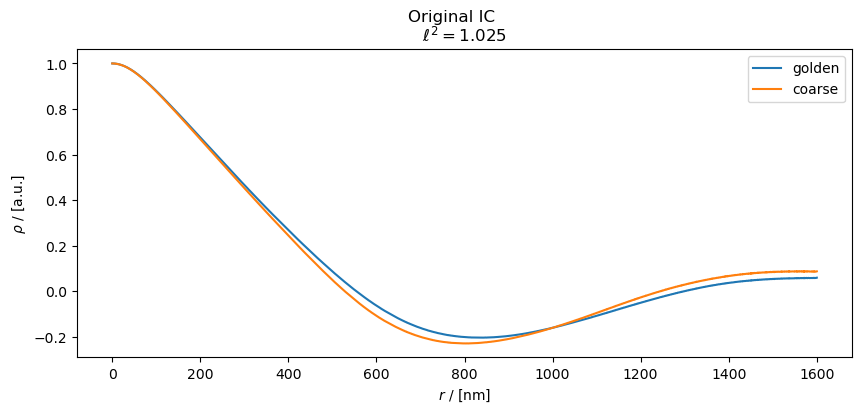

In [5]:
plt.figure(figsize=(10,4))
plt.suptitle(f"{variant.capitalize()} IC")
plt.title(f"$\ell^2 = {l2:6.4g}$")
plt.xlabel("$r$ / [nm]")
plt.ylabel("$\\rho$ / [a.u.]")
plt.plot(a_r, a_μ, label="golden");
plt.plot(b_r, b_μ, label="coarse");
plt.legend(loc="best");